In [1]:


!pip install q tensorflow==2.2.0
!pip install q keras==2.3.1

import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
%matplotlib inline

  Using cached scipy-1.4.1-cp38-cp38-manylinux1_x86_64.whl (26.0 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.2.15 requires dask[array,dataframe,delayed]<3.0,>=2.25, but you have dask 2021.4.0 which is incompatible.


Using TensorFlow backend.


In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-02', end='2021-05-05')

#show the data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996
2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007
2021-05-03,134.070007,131.830002,132.039993,132.539993,75135100.0,132.539993


In [3]:
#get the no of row and columns in the data set
df.shape

(2350, 6)

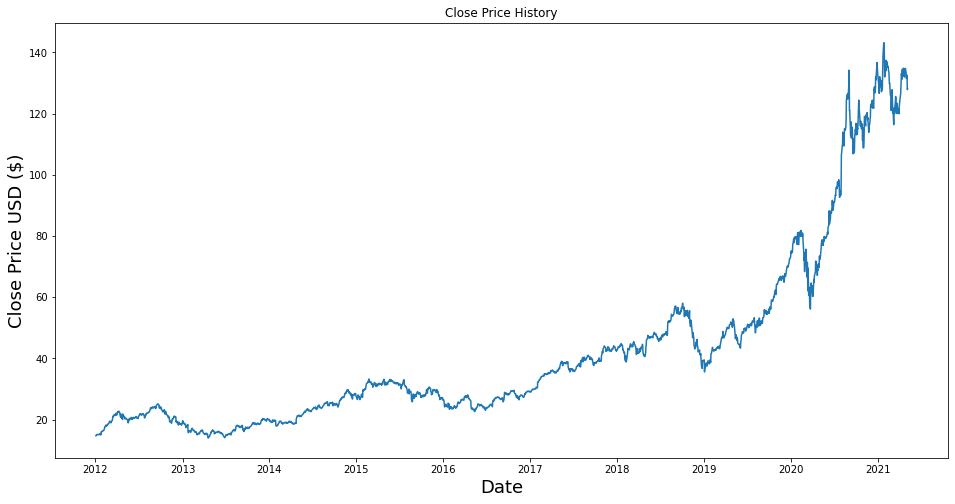

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize =  18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [5]:
#Create new df with only close column
data = df.filter(['Close'])

#convert df to np array
dataset = data.values

#get the no of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1880

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.91780973],
       [0.88151297],
       [0.88344783]])

In [7]:
#Create the training dataset
#Create the scaled training data set

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()



[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [8]:
# conver x_train and y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1820, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50 , return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50 , return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))          
          

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
1820/1820 [==============================] - 37s 21ms/step - loss: 2.0831e-04


In [13]:
#create the testing dataset
#create a new array containing scaled values from index 1619 to 2097
test_data = scaled_data[training_data_len-60 : , :]

#Create the data sets x_texts and y_test
x_test = []
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [14]:
#convert the data to np array
x_test = np.array(x_test)


In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
x_test.shape

(470, 60, 1)

In [17]:
#get the model of predicted prices values
predcitions = model.predict(x_test)
predcitions = scaler.inverse_transform(predcitions)


In [18]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predcitions - y_test)**2)
rmse

6.148532201888713

In [19]:
#predicted value
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predcitions

valid

<ipython-input-19-c2d16cb04712>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predcitions


,Close,Predictions
Date,,
2019-06-25,48.892502,47.766205
2019-06-26,49.950001,47.722797
2019-06-27,49.935001,47.740955
2019-06-28,49.480000,47.786667
2019-07-01,50.387501,47.782120
...,...,...
2021-04-29,133.479996,122.890739
2021-04-30,131.460007,122.801483
2021-05-03,132.539993,122.403732


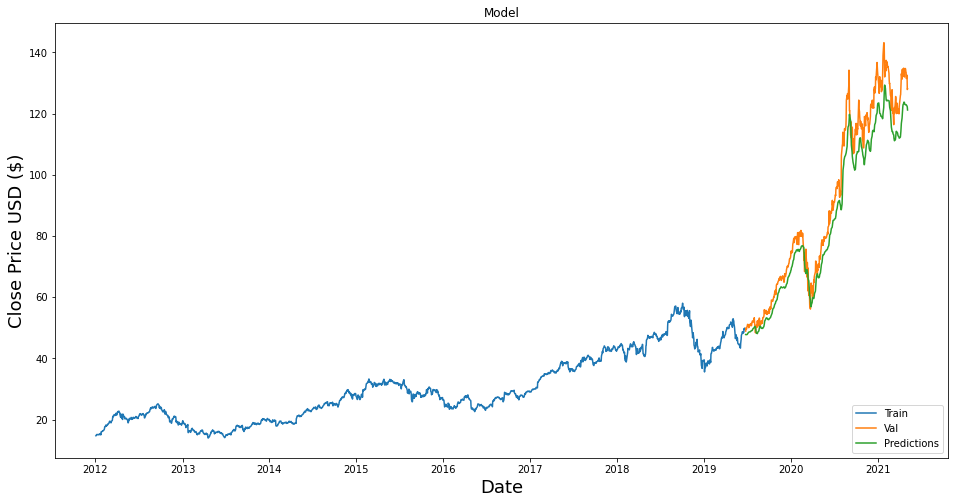

In [20]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()